# To do:
- epochs minimo 200
- ponerle una tol a las loss funciont
- no probar sobre TOOODAS las combinaciones de hiperparametros (beta de adam 2 valores, epochs mas o menos fijo)
- hacer visualizacion de funcion de costo
- ver el autovalor maximo vs epochs


mucha energia en los k bajo, poca energia en los k alto.

transformada de fourier en el medio de la imagen en el eje y, a lo largo del eje x. 

# Preguntas Pato:
- Al momento de hacer histogramas activaciones, tenemos que usar los mismos inputs para evaluar como van cambiando los histpgramas a medida que avanza el entrenamiento.
- el hessiano esta bien calcularlo en 1 un batch?
- como visualizamos el espectro del hessiano? tipo de analisis?
-  curva de numero de condicion vs epocjs
- cuando no estas en un punto critico, que significa tener autoval positivo y negativo? saddle point ?
- mostrar histogramas de hessiano

In [2]:
import nn_functions

import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
from jax import nn

import numpy as np

import matplotlib.pyplot as plt

from nn_functions import init_network_params, pack_params, layer_sizes, unpack_params
from nn_functions import update_rmsprop, update_sgd, compute_hessian, update_adam
from nn_functions import get_batches, loss, batched_predict, batched_predict_with_activations

Evaluar la performance de cada optimizador estudiando el valor de la función de costo, la calidad del
ajuste, número de iteraciones necesarias para converger (si es posible). Puede incluir también histogramas de las activaciones de las redes y de los gradientes, y calcular el espectro del Hessiano a lo largo
del entrenamiento.

In [3]:
# Load data
field = jnp.load('field.npy')
field = field - field.mean()
field = field / field.std()
field = jnp.array(field, dtype=jnp.float32)
nx, ny = field.shape
xx = jnp.linspace(-1, 1, nx)
yy = jnp.linspace(-1, 1, ny)
xx, yy = jnp.meshgrid(xx, yy, indexing='ij')
xx = jnp.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)
ff = field.reshape(-1, 1)

# SGD con minibatch

In [ ]:
def exp_scheduler(lr_k, epoch):
	

SyntaxError: incomplete input (2414648486.py, line 1)

In [ ]:
# Parámetros
num_epochs = 500
batch_size = 128
cant_epochs_a_registrar = 4
tol_loss = 1e-5 

epochs_a_registrar = np.linspace(0, num_epochs, cant_epochs_a_registrar, dtype=int)
epochs_a_registrar[-1] -= 1 

# Optimizador
update = update_sgd
step_size_0 = 0.001
scheduler = exp_scheduler

configuracion = {
	'num_epochs': num_epochs,
	'batch_size': batch_size,
	'cant_epochs_a_registrar': cant_epochs_a_registrar,
	'tol_loss': tol_loss,
	'epochs_a_registrar': epochs_a_registrar,
	'update' : update,
	'step_size_0': step_size_0,
	'scheduler': scheduler
}

def entrenar_red(configuracion):
	
    # Early stopping: paciencia
best_loss = float('inf')           
patience = 10                      
wait = 0   

#Parámetros de la red
params = init_network_params(layer_sizes, random.key(0))
params = pack_params(params)

# Logs
log_train = []
log_grads = []
log_activations = []
log_hessian = [] 

#Entrenamiento
#Iterable para obtener batches
xi, yi = next(get_batches(xx, ff, bs=num_epochs))  # xi:[x,y], yi:color

# Gradientes
grads = grad(loss)(params, xi, yi)
aux = jnp.square(grads) # Necesario para el optimizador.

for epoch in range(num_epochs):
	# Generar los batches y realizar el entrenamiento del epoch.
	idxs = random.permutation(random.key(0), xx.shape[0])
	for xi, yi in get_batches(xx[idxs], ff[idxs], bs=batch_size):
		params, aux, grads = update(params, xi, yi, step_size, aux)
	
	#Registrar el loss al finalizar cada epoch.
	train_loss = loss(params, xx, ff)
	log_train.append(train_loss.item()) # funcion de costo
	
	# Early stopping check
	if train_loss < best_loss - tol_loss:   
		best_loss = train_loss          
		wait = 0                        
	else:                               
		wait += 1                       
		if wait >= patience:           
			print(f"Corte temprano por paciencia en epoch {epoch}")  
			break    
	
	#Registrar los gradientes, activaciones y hessiano cada 20 epochs.
	if epoch in epochs_a_registrar:
		log_grads.append(grads) # un array de shape 4000 aprox
		# Obtener activaciones sobre todo el dataset
		outputs, activations = batched_predict_with_activations(params, xx) # para toda la imagen xx= (77184, 2)
		# outputs, activations = batched_predict_with_activations(params, xi)
		# activations es una lista de arrays, uno por capa, de shape (N, neurons_in_layer)
		log_activations.append(activations)
		log_hessian.append(compute_hessian(params, xi, yi))
		
		print(f"Epoch {epoch}, Loss: {train_loss}")

print(f"Epoch {epoch}, Loss: {train_loss}")

SyntaxError: unterminated string literal (detected at line 15) (1032681014.py, line 15)

In [ ]:
def entrenar_red(configuracion):
	global layer_sizes, update, step_size, num_epochs, batch_size
	layer_sizes = configuracion['layer_sizes']
	update = configuracion['update']
	step_size = configuracion['step_size']
	num_epochs = configuracion['num_epochs']
	batch_size = configuracion['batch_size']
	
	# Reiniciar los logs
	global log_train, log_grads, log_activations, log_hessian
	log_train = []
	log_grads = []
	log_activations = []
	log_hessian = []
	
	entrenar_red()  # Llamar a la función de entrenamiento

# Train Loss

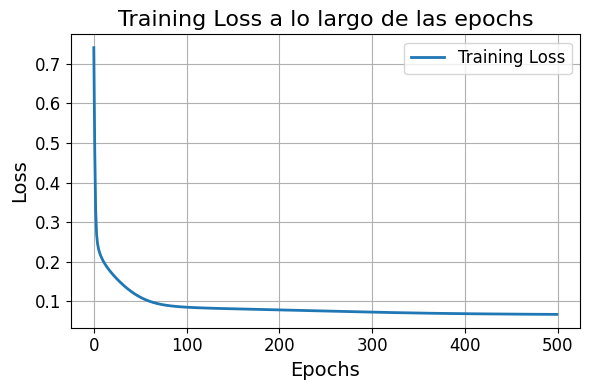

In [41]:
plt.figure(figsize=(6, 4))

plt.plot(log_train, label='Training Loss', linewidth=2)

plt.title('Training Loss a lo largo de las epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

plt.grid(True)
plt.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

## Evaluar calidad del ajuste. Graficos de la imagen.

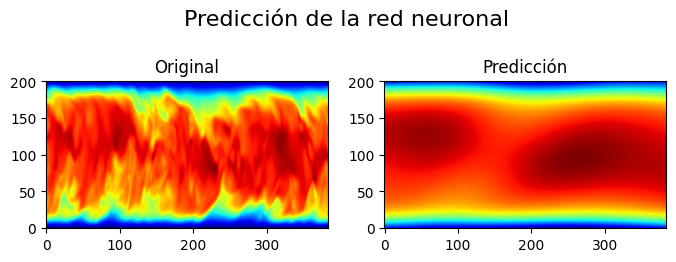

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
plt.suptitle("Predicción de la red neuronal", fontsize=16)

#Original
axes[0].imshow(ff.reshape((nx, ny)).T, origin='lower', cmap='jet')
axes[0].set_title(f"Original")

#Predicción
result= batched_predict(params, xx)
axes[1].imshow(result.reshape((nx, ny)).T, origin='lower', cmap='jet')
axes[1].set_title(f"Predicción")

plt.show()

<font color="orange"> TODO: Grafico de error por pixel, y MSE contando todos los puntos.

# Histograma de gradientes
- histograma de componentes del gradiente por capa. entendemos que para distintas epochs. (cada tantas epochs calcular el gradiente sobre algunos puntps). 

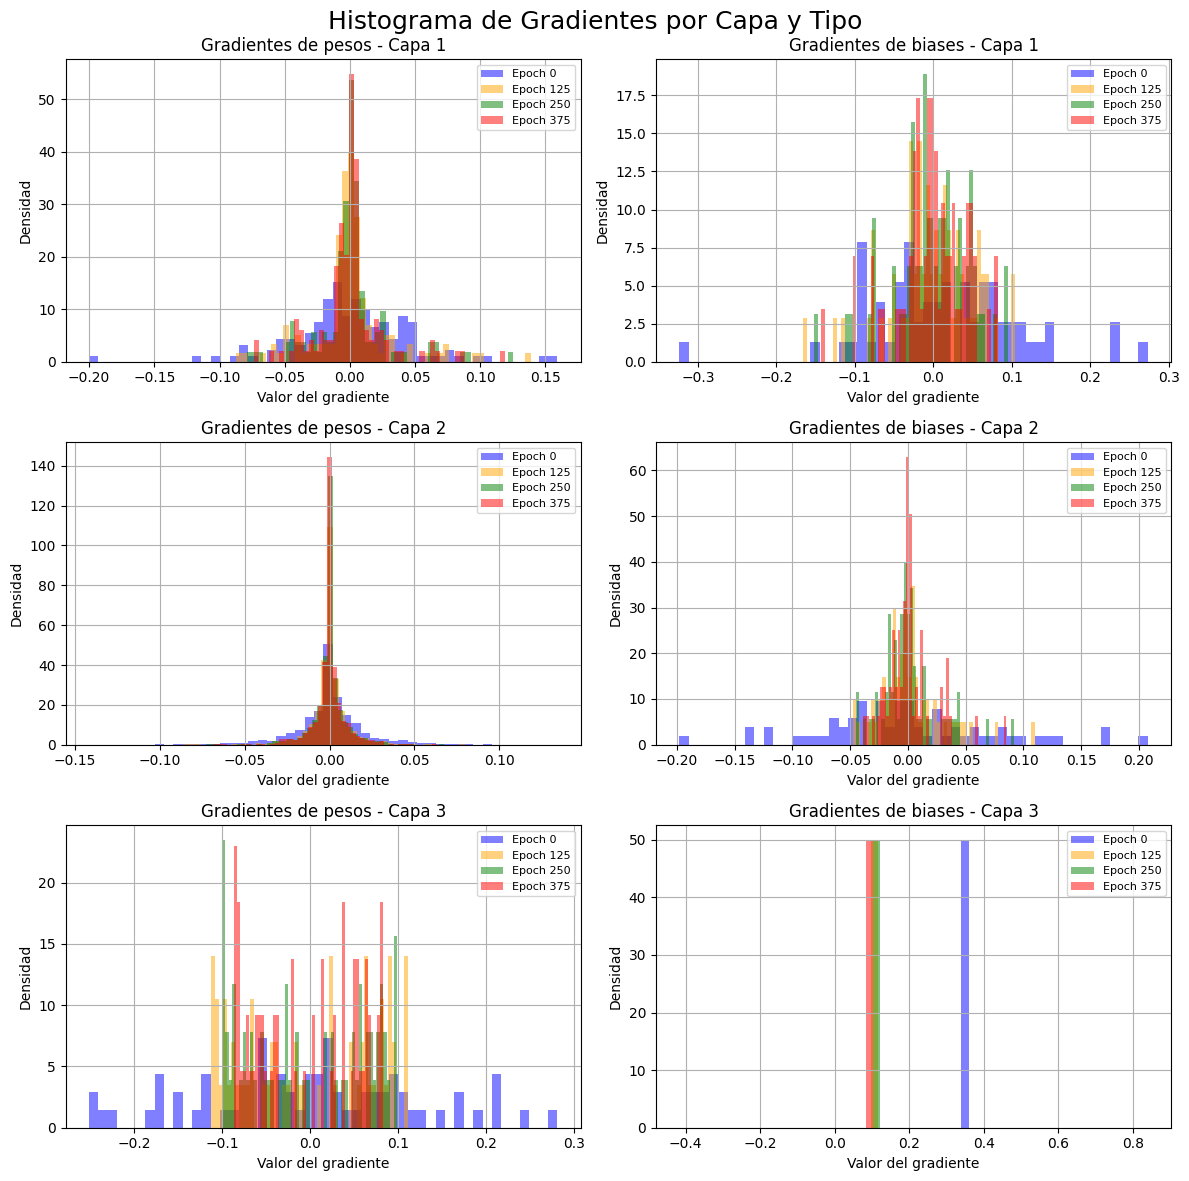

In [ ]:
# Inicializamos estructuras para acumular gradientes
num_layers = len(layer_sizes) - 1
grad_weights_by_layer = [[] for _ in range(num_layers)]
grad_biases_by_layer = [[] for _ in range(num_layers)]

# Recolectamos gradientes por capa y tipo
for grads in log_grads:
	layer_grads = unpack_params(grads)  # Lista de (w, b) por capa
	for i, (w, b) in enumerate(layer_grads):
		grad_weights_by_layer[i].append(w.flatten())
		grad_biases_by_layer[i].append(b.flatten())

# Colores por epoch
epochs = epochs_a_registrar
colors = ['blue', 'orange', 'green', 'red', 'purple']  # Asegurar de tener >= len(log_grads)

data_by_type = [grad_weights_by_layer, grad_biases_by_layer]
type_names = ["pesos", "biases"]

# Subplots: filas = capas, columnas = [weights, biases]
fig, axs = plt.subplots(num_layers, 2, figsize=(12, 4 * num_layers), squeeze=False)

for layer_idx in range(num_layers):    # filas
	for type_idx, (grad_by_layer, param_type) in enumerate(zip(data_by_type, type_names)):  # columnas
		ax = axs[layer_idx, type_idx]
		grad_list = grad_by_layer[layer_idx]
		for j, grad_values in enumerate(grad_list):
			ax.hist(
				grad_values, bins=50, alpha=0.5, density=True, 
				label=f"Epoch {epochs[j]}", color=colors[j]
			)
		ax.set_title(f"Gradientes de {param_type} - Capa {layer_idx+1}")
		ax.set_xlabel("Valor del gradiente")
		ax.set_ylabel("Densidad")
		ax.grid(True)
		ax.legend(fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.97])
fig.suptitle("Histograma de Gradientes por Capa y Tipo", fontsize=18)
plt.show()

<font color="orange"> TODO: solo graficar 3 epochs, graficar kde, eliminar los que son 1 solo valor 

# Histograma de activaciones 

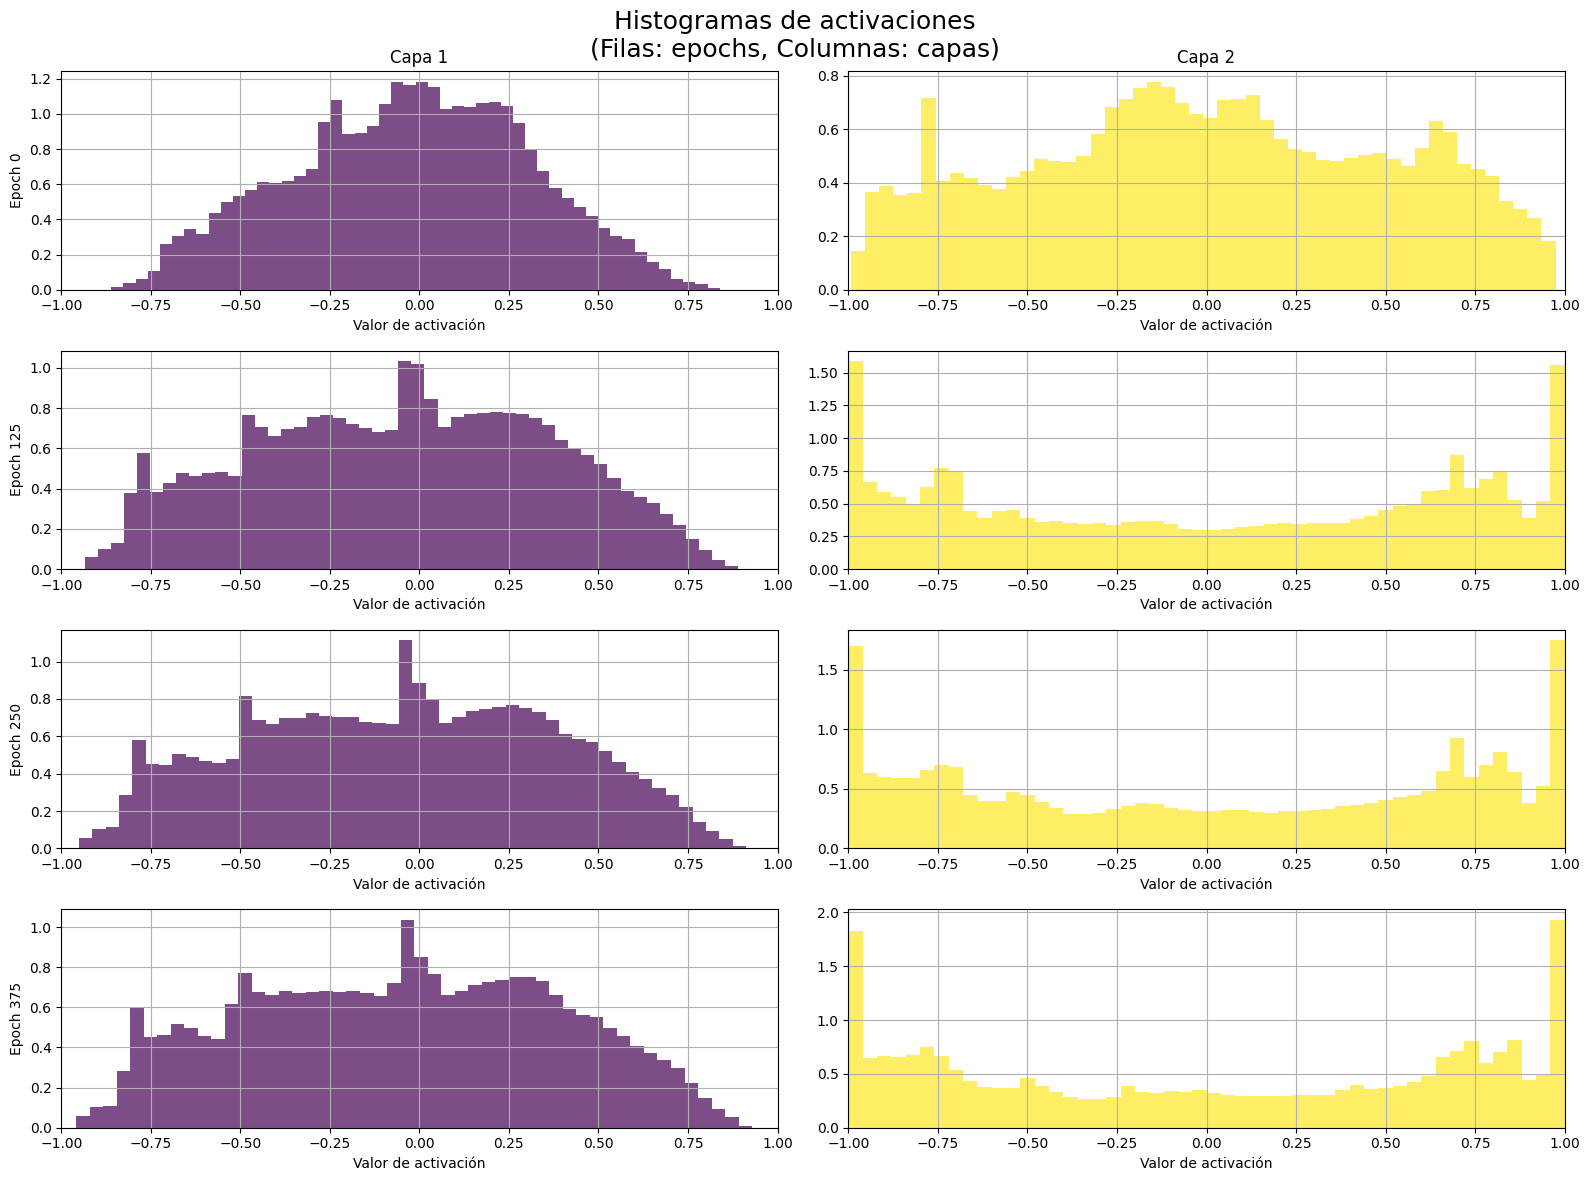

In [ ]:
def plot_activations(log_activations):
	num_epochs = len(log_activations)
	num_layers = len(log_activations[0])
	colors = plt.cm.viridis(np.linspace(0,1,num_layers))  # 1 colorificado por capa (opcional)

	fig, axs = plt.subplots(num_epochs, num_layers, figsize=(8*num_layers, 3*num_epochs), squeeze=False)

	for i_epoch, num_real_epoch in enumerate(epochs_a_registrar):      # Filas → epochs
		activs = log_activations[i_epoch]
		for i_layer in range(num_layers):  # Columnas → capas
			ax = axs[i_epoch, i_layer]
			data = np.ravel(np.array(activs[i_layer]))
			ax.hist(data, bins=50, alpha=0.7, color=colors[i_layer], density=True)
			ax.set_xlim([-1, 1])
			if i_epoch == 0:
				ax.set_title(f'Capa {i_layer+1}')
			if i_layer == 0:
				ax.set_ylabel(f'Epoch {num_real_epoch}')
			ax.set_xlabel("Valor de activación")
			ax.grid(True)

	plt.tight_layout(rect=[0, 0, 1, 0.96])
	fig.suptitle("Histogramas de activaciones\n(Filas: epochs, Columnas: capas)", fontsize=18)
	plt.show()
	
plot_activations(log_activations)

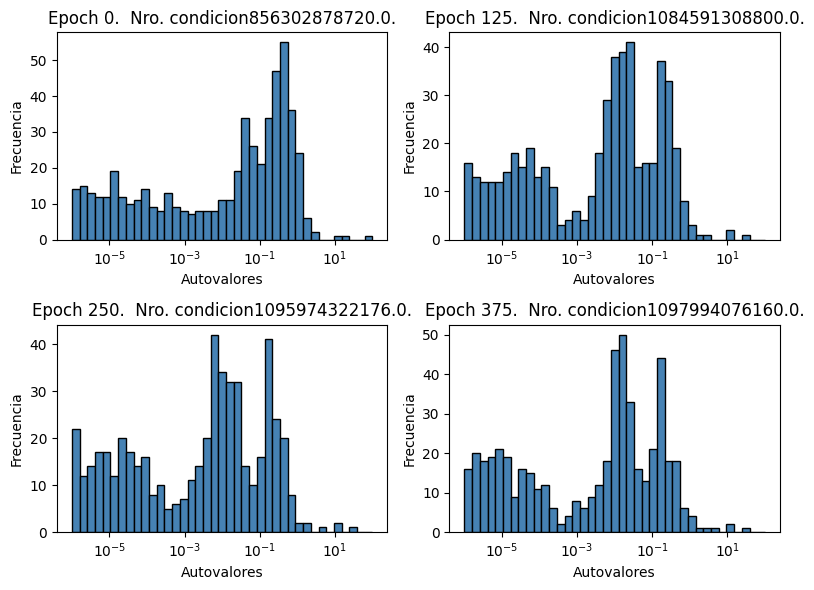

In [ ]:
num_logs = len(log_hessian)
ncols = 2  # columnas por fila
nrows = (num_logs + ncols - 1) // ncols  # filas necesarias

fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
axes = axes.flatten()  # aplanamos para indexar fácil

for i, hessian in enumerate(log_hessian):
	
	#Obtenger autovalores y los mismos en valor absoluto
	eigvals, _ = jnp.linalg.eigh(hessian)
	eigvals = jnp.array(eigvals)
	abs_eigvals = jnp.abs(eigvals)
	
	# Obtener autovalor máximo y mínimo en valor absoluto. Evito autovalores MUY pequeños para evitar
	# dvisión por cero.
	lambda_max = jnp.max(abs_eigvals)
	lambda_min = jnp.clip(jnp.min(abs_eigvals), a_min=1e-10)  # evitar división por 0

	#Bins de tamaño logarítmico
	bins = jnp.logspace(jnp.log10(0.000001), jnp.log10(100), num=40)
	
	#Ploteo
	axes[i].hist(eigvals, bins=bins, color="steelblue", edgecolor="black")

	axes[i].set_title(f"Epoch {epochs_a_registrar[i]}.  Nro. condicion{lambda_max / lambda_min}.")  # o el número real si lo tenés

	axes[i].set_xlabel("Autovalores")
	axes[i].set_xscale("log")  # ← Escala log en eje Y (frecuencia)
	axes[i].set_ylabel("Frecuencia")
	

# Apagar subplots vacíos si hay
for j in range(i+1, len(axes)):
	axes[j].axis("off")

plt.tight_layout()
plt.show()


<font color="orange"> TODO: Espectro de Fourier

# Grid Search

In [ ]:
lrs = [0.001, 0.01, 0.1]
mbs = [32, 64, 128]

listas = [lrs, mbs]
combinaciones = itertools.product(*listas)

for c in combinaciones: